In [ ]:
import pandas as pd
import numpy as np

from numpy.random import randn

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import statsmodels.formula.api as smf

from statsmodels.api import qqplot, add_constant
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_ztest
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.neural_network import MLPClassifier

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN

from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')


%matplotlib inline
matplotlib.rc('font', family = 'NanumBarunGothic')
matplotlib.rc('axes', unicode_minus = False)

#군집분석

### 데이터 구성하기

In [ ]:
df_raw = pd.read_csv("/home/piai/Bigdata/2. Big Data 분석/IRIS.csv", engine = "python")
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
continuous_vars = df_raw.iloc[:, :4]

# 데이터 표준화
scaler = StandardScaler()
scaled_data = scaler.fit_transform(continuous_vars)

df_stand = pd.DataFrame(scaled_data, columns = continuous_vars.columns)

label_encoder = LabelEncoder()
df_raw['SPECIES'] = label_encoder.fit_transform(df_raw['SPECIES'])

df_label_encoded = df_raw[['SPECIES']]

df_raw_scaled = pd.concat([df_stand, df_label_encoded], axis = 1)

In [ ]:
# 결과 확인
df_raw_scaled

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES
0,-0.900681,1.019004,-1.340227,-1.315444,0
1,-1.143017,-0.131979,-1.340227,-1.315444,0
2,-1.385353,0.328414,-1.397064,-1.315444,0
3,-1.506521,0.098217,-1.283389,-1.315444,0
4,-1.021849,1.249201,-1.340227,-1.315444,0
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,2
146,0.553333,-1.282963,0.705921,0.922303,2
147,0.795669,-0.131979,0.819596,1.053935,2
148,0.432165,0.788808,0.933271,1.448832,2


#### 데이터 분리

In [ ]:
# 목표 변수
df_raw_y = df_raw_scaled.iloc[:, 0]

# 설명 변수
df_raw_x = df_raw_scaled.iloc[:, 1:]

## 계층형 군집분석

In [ ]:
# 연결: ward, 거리 계산: Euclidean: ward~Euclidean
Z_ward = linkage(df_raw_x, method = "ward", metric = "euclidean")
# 연결: average, 거리 계산: Euclidean
Z_average = linkage(df_raw_x, method = "average", metric = "euclidean")

In [ ]:
# 군집 생성 결과 확인
Z_ward

array([[2.00000000e+00, 4.20000000e+01, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 3.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 0.00000000e+00, 2.00000000e+00],
       [7.40000000e+01, 9.70000000e+01, 0.00000000e+00, 2.00000000e+00],
       [6.60000000e+01, 8.40000000e+01, 0.00000000e+00, 2.00000000e+00],
       [1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [0.00000000e+00, 3.60000000e+01, 5.68374269e-02, 2.00000000e+00],
       [1.00000000e+00, 3.80000000e+01, 5.68374269e-02, 2.00000000e+00],
       [1.10000000e+01, 2.00000000e+01, 5.68374269e-02, 2.00000000e+00],
       [1.70000000e+01, 4.00000000e+01, 5.68374269e-02, 2.00000000e+00],
       [7.10000000e+01, 9.90000000e+01, 5.68374269e-02, 2.00000000e+00],
       [2.60000000e+01, 3.10000000e+01, 5.68374269e-02, 2.00000000e+00],
       [1.27000000e+02, 1.38000000e+02, 5.68374269e

Text(0, 0.5, 'Distance')

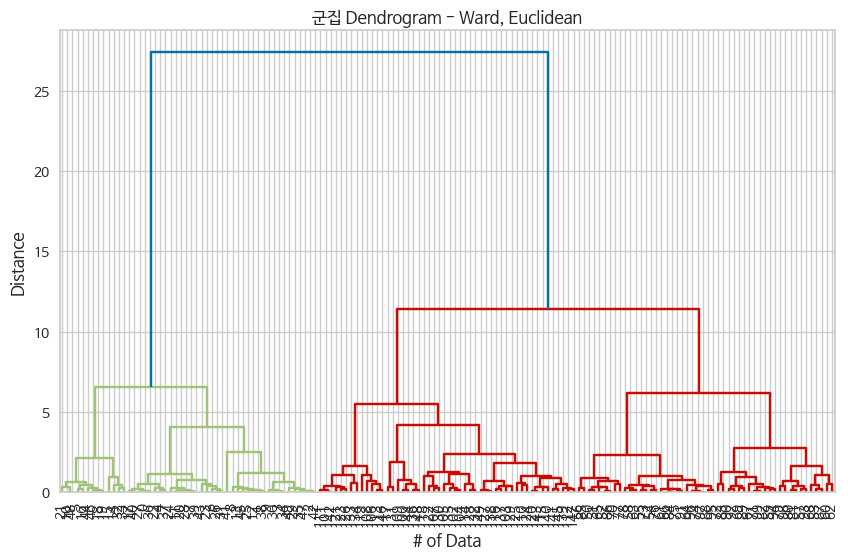

In [ ]:
#덴드로그램[연결: ward, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111)

# DataFrame 변경:Z_ward, Z_average, Z_Minkowski
dendrogram(Z_ward, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Ward, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

Text(0, 0.5, 'Distance')

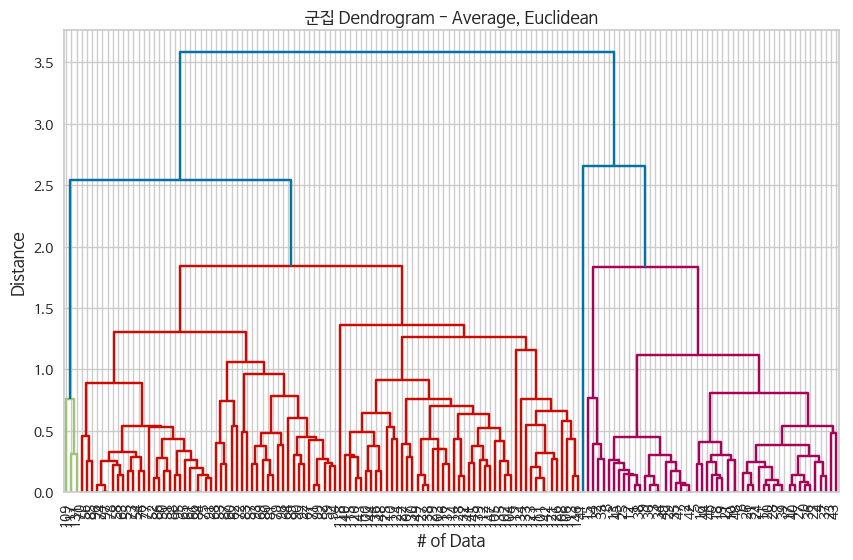

In [ ]:
#덴드로그램[연결: average, 거리 계산: Euclidean]
plt.figure(figsize=(10,6))
ax = plt.subplot(111)
dendrogram(Z_average, leaf_font_size=10, orientation= "top")
plt.title("군집 Dendrogram - Average, Euclidean")
plt.xlabel("# of Data")
plt.ylabel("Distance")

In [ ]:
# linkage 함수를 통해 얻은 Z_ward 행렬 데이터를 이용하여 군집 생성
cluster_H = fcluster(Z = Z_ward, t = 5, criterion="distance")
# 데이터에 계층형 군집 결과 입력
df_raw["cluster_H"] = cluster_H
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2


In [ ]:
# 집계 함수를 이용한 군집별 데이터 요약
df_summary_H = df_raw.groupby("cluster_H").agg(["min", "mean", "max"])
# 집계 함수를 이용할 경우 열 이름이 두 줄에 걸쳐 나오므로 한 줄로 변환
level0 = df_summary_H.columns.get_level_values(0)
level1 = df_summary_H.columns.get_level_values(1)
df_summary_H.columns = level0 + "_" + level1
df_summary_H.reset_index(inplace = True)
df_summary_H.round(3)

,cluster_H,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,5.1,5.369,5.8,3.7,3.908,4.4,1.2,1.523,1.9,0.1,0.285,0.4,0,0.0,0
1,2,4.3,4.878,5.5,2.3,3.259,3.6,1.0,1.441,1.9,0.1,0.232,0.6,0,0.0,0
2,3,4.9,6.008,6.7,2.2,2.615,2.8,4.5,5.085,5.8,1.4,1.777,2.0,2,2.0,2
3,4,5.8,6.792,7.9,2.6,3.100,3.8,4.8,5.716,6.9,1.6,2.114,2.5,2,2.0,2
4,5,5.4,6.193,7.0,2.8,3.004,3.4,3.6,4.500,5.0,1.2,1.430,1.8,1,1.0,1
5,6,4.9,5.635,6.3,2.0,2.496,2.8,3.0,3.978,5.1,1.0,1.204,1.6,1,1.0,1


array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_H'>]],
      dtype=object)

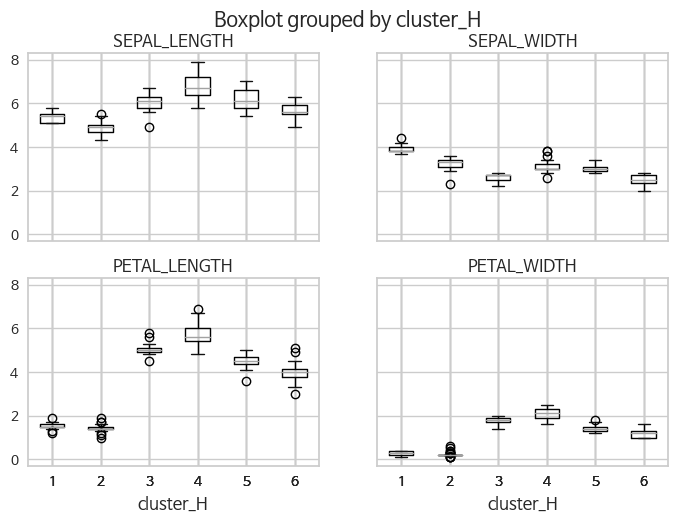

In [ ]:
# Boxplot을 활용한 군집별 설명변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH",  "PETAL_WIDTH"]
               , by = "cluster_H")

array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_H'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_H'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_H'>]],
      dtype=object)

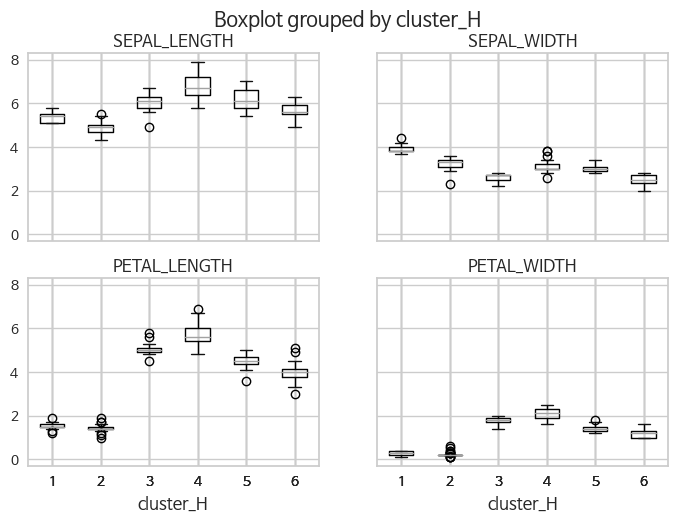

In [ ]:
# Boxplot을 활용한 군집별 변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH",  "PETAL_WIDTH"]
               , by = "cluster_H")

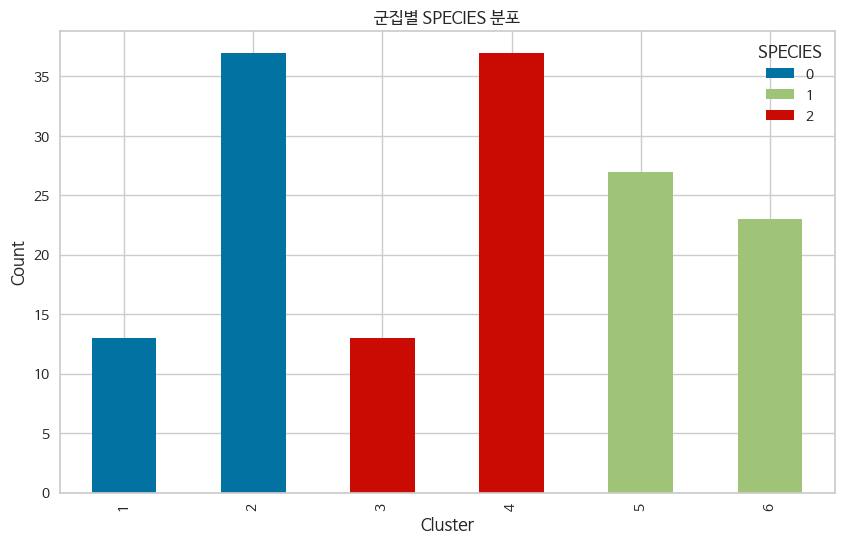

In [ ]:
species_distribution = df_raw.groupby('cluster_H')['SPECIES'].value_counts().unstack().fillna(0)

# 막대 그래프로 시각화
species_distribution.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("군집별 SPECIES 분포")
plt.xlabel("Cluster")
plt.ylabel("Count")
plt.legend(title="SPECIES")
plt.show()

## k-평균 군집분석

In [ ]:
# 최대 군집 생성 개수
n_iter_cluster = 15
cluster_range = [i+1 for i in range(n_iter_cluster)]
clus_error = []
for v_n_clus in cluster_range:
    clus = KMeans(v_n_clus)
    clus.fit(df_raw_x)

    # 각 데이터로부터 가장 가까운 군집 중심점까지 거리 제곱합
    clus_error.append(clus.inertia_)
df_error = pd.DataFrame({"NumberofCluster": cluster_range, "Error": clus_error})
df_error.round(3)

,NumberofCluster,Error
0,1,550.000
1,2,174.564
2,3,107.525
3,4,84.690
4,5,64.636
5,6,48.738
6,7,41.048
7,8,35.463
8,9,30.987
9,10,28.446


Text(0, 0.5, 'Sum of Square')

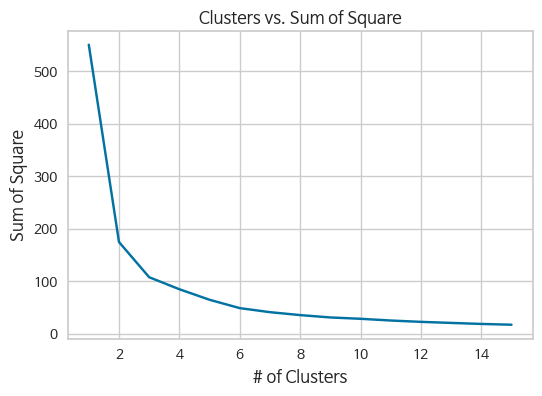

In [ ]:
plt.figure(figsize=(6,4))
plt.plot(df_error["NumberofCluster"], df_error["Error"])
plt.title("Clusters vs. Sum of Square")
plt.xlabel("# of Clusters")
plt.ylabel("Sum of Square")

In [ ]:
clus = KMeans(5)
clus.fit(df_raw_x)
cluster_KM = [i+1 for i in clus.labels_]
df_raw["cluster_KM"] = cluster_KM
df_raw.head(10)

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H,cluster_KM
0,5.1,3.5,1.4,0.2,0,2,3
1,4.9,3.0,1.4,0.2,0,2,3
2,4.7,3.2,1.3,0.2,0,2,3
3,4.6,3.1,1.5,0.2,0,2,3
4,5.0,3.6,1.4,0.2,0,2,5
5,5.4,3.9,1.7,0.4,0,1,5
6,4.6,3.4,1.4,0.3,0,2,3
7,5.0,3.4,1.5,0.2,0,2,3
8,4.4,2.9,1.4,0.2,0,2,3
9,4.9,3.1,1.5,0.1,0,2,3


In [ ]:
df_summary_KM = df_raw.drop("cluster_H", axis = 1, inplace=False). \
    groupby("cluster_KM").agg(["min", "mean", "max"])
level0 = df_summary_KM.columns.get_level_values(0)
level1 = df_summary_KM.columns.get_level_values(1)
df_summary_KM.columns = level0 + "_" + level1
df_summary_KM.reset_index(inplace = True)
df_summary_KM.round(3)

,cluster_KM,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,5.6,6.635,7.9,2.5,3.000,3.8,4.8,5.585,6.9,1.4,2.044,2.5,2,2.000,2
1,2,5.4,6.167,7.0,2.7,2.980,3.4,3.6,4.490,5.1,1.2,1.427,1.8,1,1.000,1
2,3,4.3,4.882,5.5,2.3,3.229,3.5,1.1,1.456,1.9,0.1,0.238,0.6,0,0.000,0
3,4,4.9,5.577,6.3,2.0,2.445,2.7,3.0,3.991,5.0,1.0,1.214,1.7,1,1.091,2
4,5,4.6,5.269,5.8,3.6,3.850,4.4,1.0,1.475,1.9,0.1,0.262,0.4,0,0.000,0


array([[<Axes: title={'center': 'SEPAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'SEPAL_WIDTH'}, xlabel='cluster_KM'>],
       [<Axes: title={'center': 'PETAL_LENGTH'}, xlabel='cluster_KM'>,
        <Axes: title={'center': 'PETAL_WIDTH'}, xlabel='cluster_KM'>]],
      dtype=object)

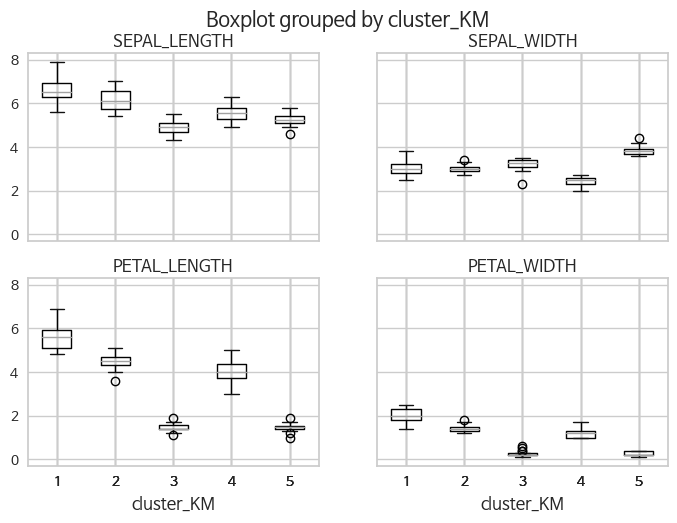

In [ ]:
# Boxplot을 활용한 군집별 tjfaud변수 분포
df_raw.boxplot(column=["SEPAL_LENGTH", "SEPAL_WIDTH","PETAL_LENGTH", "PETAL_WIDTH"]
               , by = "cluster_KM")

## 적정 군집 수 결정

In [ ]:
# scipy.cluster.hierarchy의 계층형 군집분석은 실루엣 계수 산출 안됨
# 실루엣 계수 산출:sklearn.AgglomerativeClustering(계층형군집분석)
cls_h = AgglomerativeClustering(n_clusters=3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_h = AgglomerativeClustering(n_clusters=4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_h, metric='euclidean')
print( "계층형(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

계층형(군집 수=3) 실루엣 계수 =  0.521
계층형(군집 수=4) 실루엣 계수 =  0.47


In [ ]:
# 실루엣 계수 산출:sklearn.KMeans(k평균군집분석)
cls_k = KMeans(3).fit_predict(df_raw_x)  # 군집 수 =3
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=3) 실루엣 계수 = ",format(round(sil_score,3)))

cls_k = KMeans(4).fit_predict(df_raw_x)  # 군집 수 =4
sil_score = silhouette_score(df_raw_x, cls_k)
print( "k-평균(군집 수=4) 실루엣 계수 = ",format(round(sil_score,3)))

k-평균(군집 수=3) 실루엣 계수 =  0.517
k-평균(군집 수=4) 실루엣 계수 =  0.503


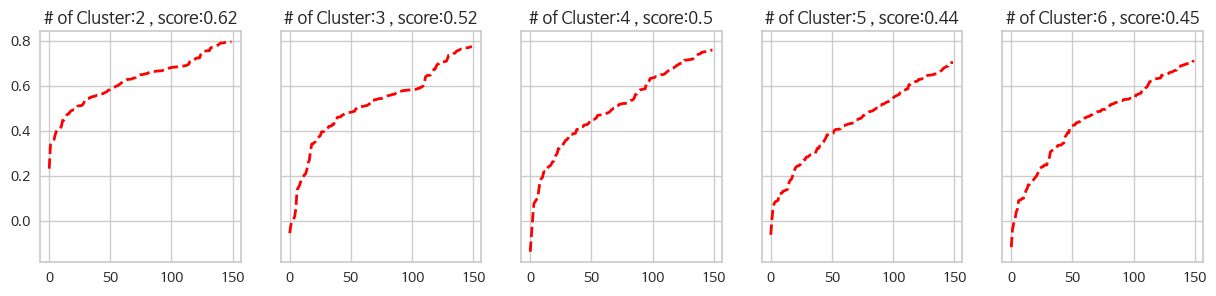

In [ ]:
f, axes = plt.subplots(1, 5, sharex=True, sharey=True)
f.set_size_inches(15, 3)

for i, ax in enumerate(axes):
#     cluster_nums = AgglomerativeClustering(n_clusters=i+2).fit_predict(df_raw_x)
    cluster_nums = KMeans(n_clusters=i+2).fit_predict(df_raw_x)

    sil_samples = silhouette_samples(df_raw_x, cluster_nums, metric='euclidean')
    sil_score = silhouette_score(df_raw_x, cluster_nums, metric='euclidean')
    ax.plot(sorted(sil_samples), color='red',linestyle='dashed', linewidth=2)
    ax.set_title("# of Cluster:{} , score:{}".format(round(i+2), format(round(sil_score, 2))))
plt.savefig('../sil_of_cluster.svg')
plt.show()

### 적정 군집 수 결정

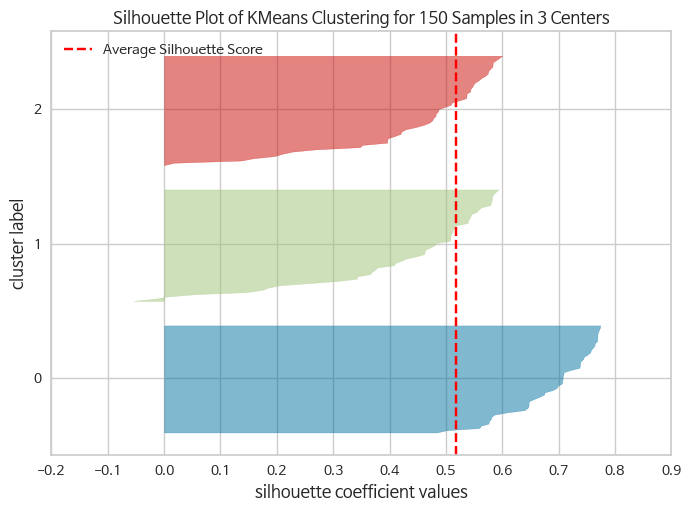

실루엣 계수 =  0.5173


In [ ]:
# yellowbrick 라이브러리의 SilhouetteVisualizer 이용

clus = KMeans(3)
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')

#생성된 visualizer에 데이터 입력
graph_sil.fit(df_raw_x)
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

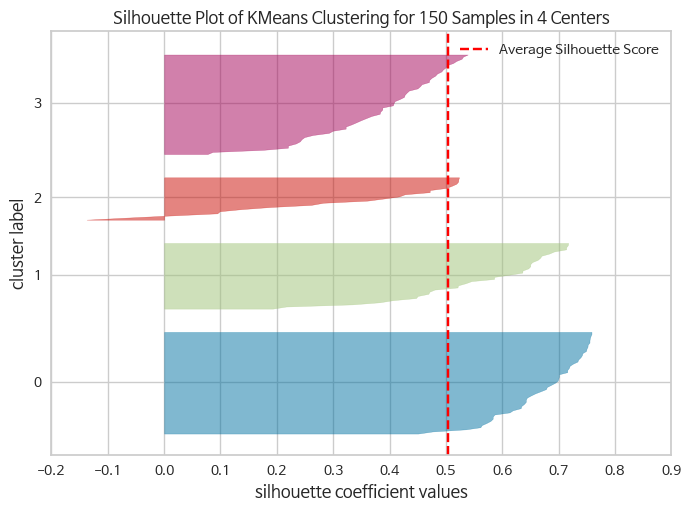

실루엣 계수 =  0.5033


In [ ]:
clus = KMeans(4)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력
graph_sil.fit(df_raw_x)
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

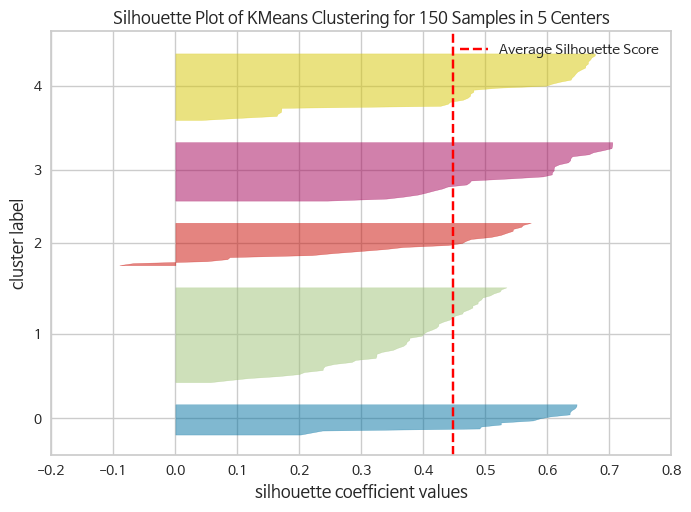

실루엣 계수 =  0.4481


In [ ]:
clus = KMeans(5)

#visualizer 생성
graph_sil = SilhouetteVisualizer(clus, colors='yellowbrick')
#생성된 visualizer에 데이터 입력
graph_sil.fit(df_raw_x)
graph_sil.show()
print( "실루엣 계수 = ",format(round(graph_sil.silhouette_score_,4)))

### DBSCAN 군집

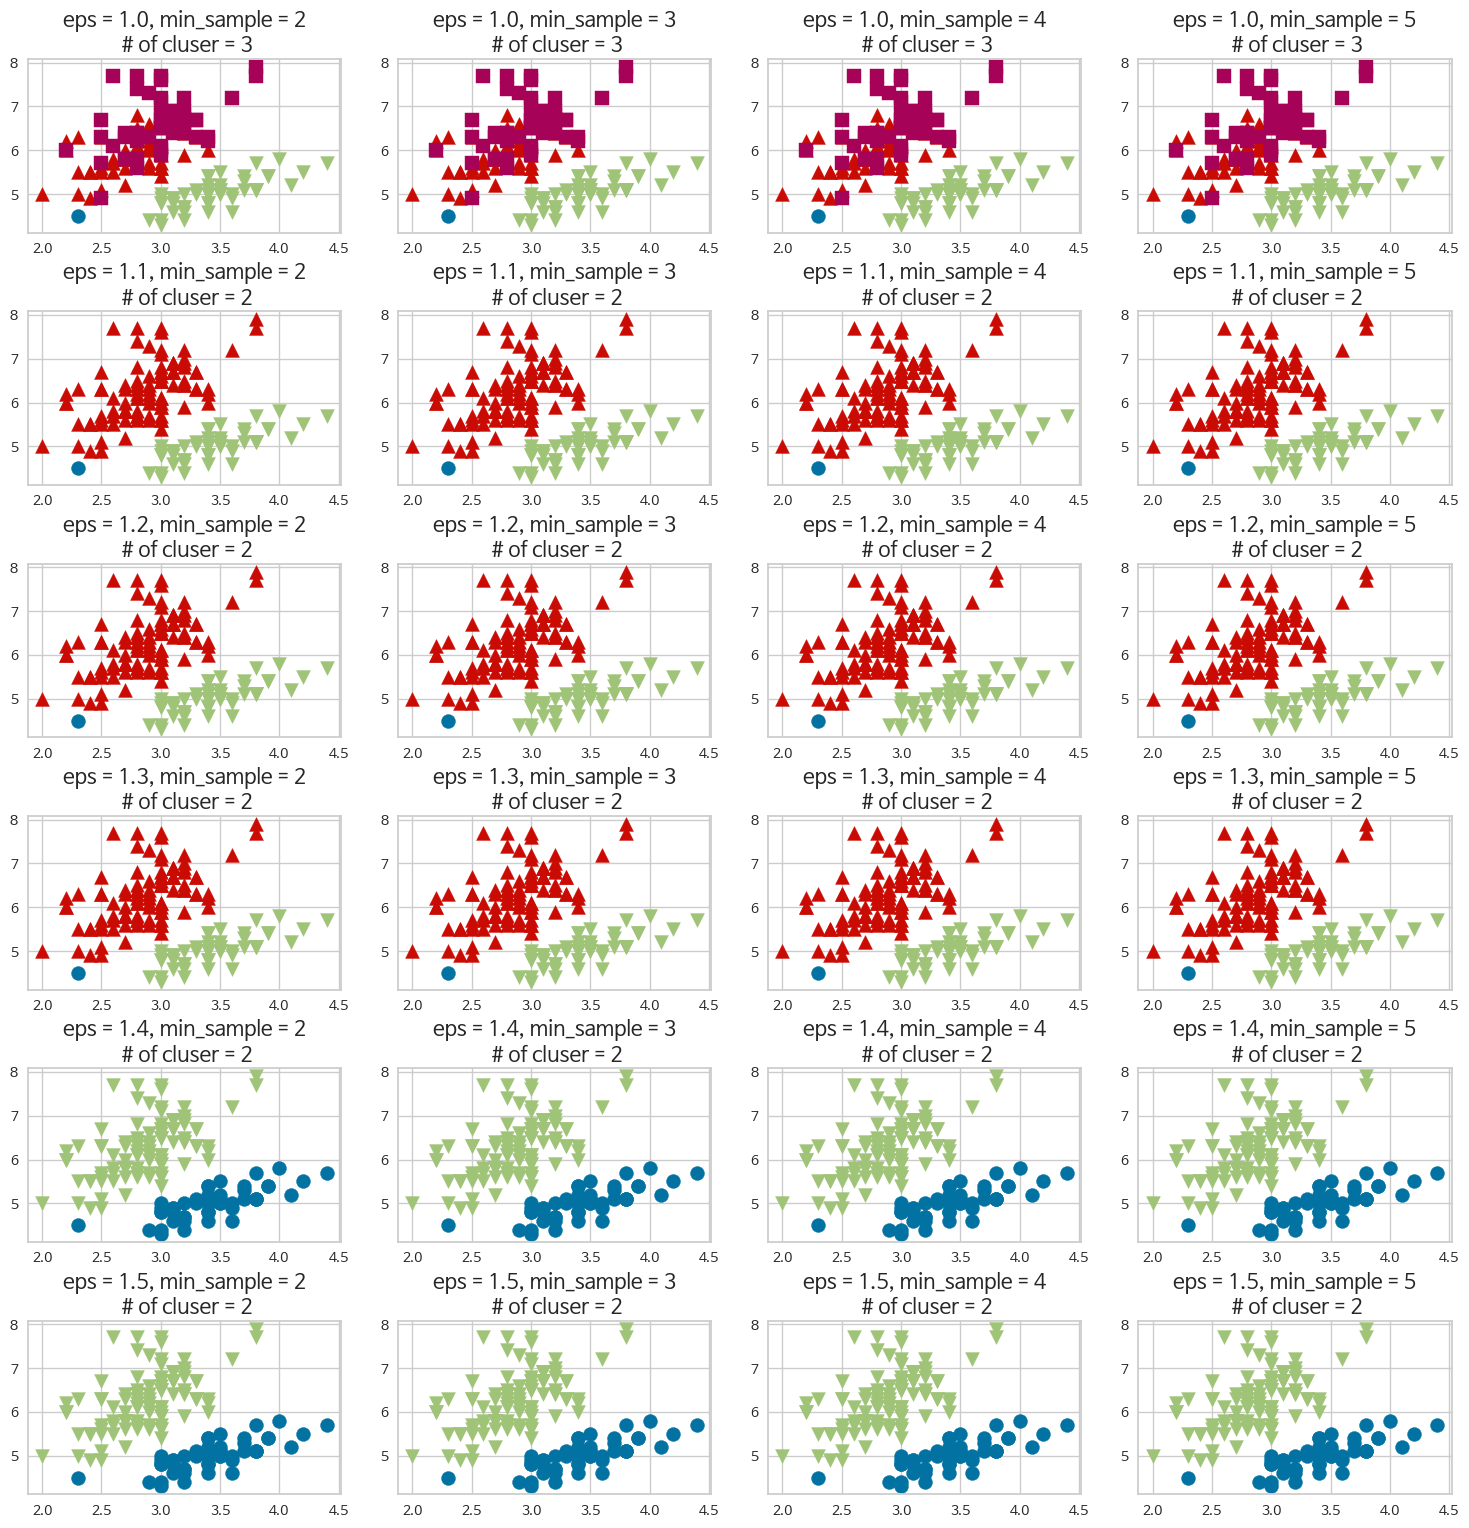

In [ ]:
X = df_raw["SEPAL_WIDTH"]
Y = df_raw["SEPAL_LENGTH"]
# 데이터 point 그림 종류
markers = ["o", "v", "^", "s", "<", ">", "p", "D"]
# eps: 1.0~1.5, min_sample: 2~5
para_eps = [k/10 for k in range(10, 16, 1)]
para_min_sample = [2,3,4,5]
fig, axes = plt.subplots(len(para_eps), len(para_min_sample), figsize = (15, 15)) # plot 개수
fig.tight_layout(w_pad=1, h_pad=3) # plot 간 간격
# enumerate(): 값의 index와 값을 순차적으로 반환
for i, eps in enumerate(para_eps):
    for j, min_sample in enumerate(para_min_sample):
        dbscan = DBSCAN(min_samples=min_sample, eps = eps) # dbscan 실행
        clusters = dbscan.fit_predict(df_raw_x) # 예측 분류
        clusters = clusters + 1 # noise의 경우 -1로 표기되므로 1씩 더하여 0으로 변환
        for (n_clus, clus) in enumerate(range(min(clusters), max(clusters)+1, 1)): # 군집별 다른 그림 지정
            axes[i, j].scatter(X[clusters == clus], Y[clusters == clus], marker = markers[n_clus], s = 100)
            axes[i, j].set_title("eps = " + str(eps) + ", min_sample = " + str(min_sample) +\
                                 "\n # of cluser = " + str(max(clusters)), fontsize = 15)


In [ ]:
# eps: 특정 데이터로부터 다른 데이터를 포함하는 거리 min_samples: 군집이 되기 위한 최소 데이터 수
dbscan = DBSCAN(eps=1.4, min_samples=2).fit(df_raw_x)
# 군집 결과
cluster_DB = dbscan.labels_
# sklearn의 DBSCAN에서는 noise 데이터의 경우 군집이 -1로 표시되며 0번 군집부터 시작
# 다른 계층형, K-평균은 1번 군집부터 시작하므로 다른 군집 번호와 통일. Noise 데이터는 0번 군집으로 표기
for (i, val) in enumerate(cluster_DB):
    if val < 0:
        cluster_DB[i] = 0
    else:
        cluster_DB[i] = cluster_DB[i] + 1
df_raw["cluster_DB"] = cluster_DB
df_raw.head()

,SEPAL_LENGTH,SEPAL_WIDTH,PETAL_LENGTH,PETAL_WIDTH,SPECIES,cluster_H,cluster_KM,cluster_DB
0,5.1,3.5,1.4,0.2,0,2,3,1
1,4.9,3.0,1.4,0.2,0,2,3,1
2,4.7,3.2,1.3,0.2,0,2,3,1
3,4.6,3.1,1.5,0.2,0,2,3,1
4,5.0,3.6,1.4,0.2,0,2,5,1


In [ ]:
# DB 스캔 군집별 요약 통계량
df_summary_DB = df_raw.drop(["cluster_H", "cluster_KM"],
                                   axis = 1,
                                   inplace=False).\
                groupby("cluster_DB").agg(["min", "mean", "max"])
level0 = df_summary_DB.columns.get_level_values(0)
level1 = df_summary_DB.columns.get_level_values(1)
df_summary_DB.columns = level0 + "_" + level1
df_summary_DB.reset_index(inplace = True)
df_summary_DB.round(3)


,cluster_DB,SEPAL_LENGTH_min,SEPAL_LENGTH_mean,SEPAL_LENGTH_max,SEPAL_WIDTH_min,SEPAL_WIDTH_mean,SEPAL_WIDTH_max,PETAL_LENGTH_min,PETAL_LENGTH_mean,PETAL_LENGTH_max,PETAL_WIDTH_min,PETAL_WIDTH_mean,PETAL_WIDTH_max,SPECIES_min,SPECIES_mean,SPECIES_max
0,1,4.3,5.006,5.8,2.3,3.428,4.4,1.0,1.462,1.9,0.1,0.246,0.6,0,0.0,0
1,2,4.9,6.262,7.9,2.0,2.872,3.8,3.0,4.906,6.9,1.0,1.676,2.5,1,1.5,2


# 느낀점
=> 덴드로그램을 통해 군집 간의 유사성을 시각적으로 파악할 수 있었으며, 거리 기준을 설정하여 군집을 나누는 방법을 알 수 있었다. 처음에 # 막대 그래프로 시각화 오류가 반복됐으나 'species_distribution = df_raw.groupby('cluster_H')['SPECIES'].value_counts().unstack().fillna(0)' 이렇게 코드를 수정해주니 오류가 생기지 않고 그래프 시각화를 성공할 수 있었다.

# 연관규칙

In [ ]:
df2 = pd.read_csv("/home/piai/Bigdata/2. Big Data 분석/구매이력.csv", encoding = 'euc-kr')
df2

,ID,PRODUCT
0,CS-102,양주
1,CS-102,양주
2,CS-103,소다
3,CS-103,크래커
4,CS-103,맥주
...,...,...
100,CS-148,소다
101,CS-149,크래커
102,CS-149,맥주
103,CS-150,소다


In [ ]:
# 고객 ID 리스트 행성 및 정렬
ID = list(set(df2["ID"]))
ID.sort()

# 고객ID별 상품 매칭
list_association = []
for i in ID:
    # ID별 구매 데이터 추출
    tmp_list = list(df2[df2["ID"] == i]["PRODUCT"])
    tmp_list.sort()
    # ID별 구매 데이터를 리스트에 담기
    list_association.append(tmp_list)

# 리스트 출력
for row in list_association:
    print(row)

['양주', '양주']
['맥주', '소다', '크래커']
['맥주', '크래커']
['양주', '크래커']
['맥주', '콜라']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['맥주', '콜라']
['맥주', '양주', '콜라']
['맥주', '소다', '양주', '크래커']
['양주']
['맥주', '콜라']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주', '소다']
['소다', '양주', '크래커']
['크래커']
['양주', '콜라']
['맥주', '소다', '양주', '콜라', '크래커']
['양주', '콜라']
['맥주', '크래커']
['맥주', '소다', '크래커']
['맥주', '소다', '양주', '크래커']
['맥주']
['맥주', '콜라']
['양주', '콜라', '크래커']
['맥주', '콜라']
['맥주', '크래커']
['맥주']
['맥주', '소다', '양주', '크래커']
['맥주', '소다', '콜라']
['맥주', '콜라', '크래커']
['맥주', '양주']
['맥주', '콜라']
['맥주', '크래커']
['맥주', '소다', '양주', '크래커']
['소다', '양주', '콜라']
['맥주', '크래커']
['소다', '크래커']


In [ ]:
# Items 기준으로 포함 여부에 따라 True/False 로 변환
enc = TransactionEncoder()
df2_enc = enc.fit_transform(X = list_association)

# 함수 fit_transform 는 데이터를 행렬의 형태로 반환, pandas의 DataFrame의 형태로 변환
df_asso = pd.DataFrame(df2_enc, columns = enc.columns_)

df_asso.head()

,맥주,소다,양주,콜라,크래커
0,False,False,True,False,False
1,True,True,False,False,True
2,True,False,False,False,True
3,False,False,True,False,True
4,True,False,False,True,False


#### 연관규칙 생성

In [ ]:
# 규칙 선택 최소 지지
v_min_support = 0.2

# 연관규칙 생성 및 지지도 임계값 적용
df_freq = apriori(df_asso, min_support = v_min_support, use_colnames = True)

# itemsets 항목 확인
df_freq.round(3)

,support,itemsets
0,0.744,(맥주)
1,0.349,(소다)
2,0.442,(양주)
3,0.372,(콜라)
4,0.512,(크래커)
5,0.279,"(맥주, 소다)"
6,0.233,"(양주, 맥주)"
7,0.256,"(콜라, 맥주)"
8,0.395,"(맥주, 크래커)"
9,0.233,"(양주, 소다)"


#### 연관규칙 선택

In [ ]:
#향상도 기준 : lift
df_asso_rule = association_rules(df_freq, metric="lift" ,min_threshold = 0.2)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(맥주),(소다),0.744,0.349,0.279,0.375,1.075,0.019,1.042,0.273
1,(소다),(맥주),0.349,0.744,0.279,0.800,1.075,0.019,1.279,0.107
2,(양주),(맥주),0.442,0.744,0.233,0.526,0.707,-0.096,0.540,-0.426
3,(맥주),(양주),0.744,0.442,0.233,0.312,0.707,-0.096,0.812,-0.618
4,(콜라),(맥주),0.372,0.744,0.256,0.688,0.924,-0.021,0.819,-0.116
5,(맥주),(콜라),0.744,0.372,0.256,0.344,0.924,-0.021,0.957,-0.244
6,(맥주),(크래커),0.744,0.512,0.395,0.531,1.038,0.015,1.042,0.144
7,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076
8,(양주),(소다),0.442,0.349,0.233,0.526,1.509,0.078,1.375,0.604
9,(소다),(양주),0.349,0.442,0.233,0.667,1.509,0.078,1.674,0.518


In [ ]:
#신뢰도 기준:confidence
df_asso_rule = association_rules(df_freq, metric="confidence" ,min_threshold = 0.2)
df_asso_rule.round(3)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(맥주),(소다),0.744,0.349,0.279,0.375,1.075,0.019,1.042,0.273
1,(소다),(맥주),0.349,0.744,0.279,0.800,1.075,0.019,1.279,0.107
2,(양주),(맥주),0.442,0.744,0.233,0.526,0.707,-0.096,0.540,-0.426
3,(맥주),(양주),0.744,0.442,0.233,0.312,0.707,-0.096,0.812,-0.618
4,(콜라),(맥주),0.372,0.744,0.256,0.688,0.924,-0.021,0.819,-0.116
5,(맥주),(콜라),0.744,0.372,0.256,0.344,0.924,-0.021,0.957,-0.244
6,(맥주),(크래커),0.744,0.512,0.395,0.531,1.038,0.015,1.042,0.144
7,(크래커),(맥주),0.512,0.744,0.395,0.773,1.038,0.015,1.126,0.076
8,(양주),(소다),0.442,0.349,0.233,0.526,1.509,0.078,1.375,0.604
9,(소다),(양주),0.349,0.442,0.233,0.667,1.509,0.078,1.674,0.518
